In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_flash = pd.read_excel("data/data_flash.xlsx", skiprows=[1])

In [7]:
df_flash

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
0,8.396544,41.087268,423.686554,39.934969,0.588747
1,9.082950,48.346588,424.259215,31.457617,0.598482
2,6.216424,67.817254,408.585088,13.055781,0.623558
3,9.225468,59.510814,425.167629,22.426689,0.613161
4,9.664251,60.578692,424.739170,19.518728,0.612980
...,...,...,...,...,...
95,1.667272,51.473235,368.754325,26.801976,0.614382
96,6.464699,40.016087,410.139154,40.787753,0.589927
97,1.563050,58.028562,363.970901,22.552990,0.621157
98,8.090567,73.401544,418.364386,6.508422,0.626177


In [8]:
df_flash.describe()

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.501223,60.005027,401.525140,19.972336,0.615892
std,2.607997,11.615314,19.983666,11.704624,0.013549
min,1.084085,40.016087,353.714405,-0.110367,0.587500
25%,3.298718,50.201409,386.967753,10.000121,0.606410
50%,5.498753,59.959207,404.947014,20.119785,0.617200
75%,7.742102,69.986606,418.113717,30.278517,0.625522
max,9.925913,79.876256,432.434602,40.787753,0.642213


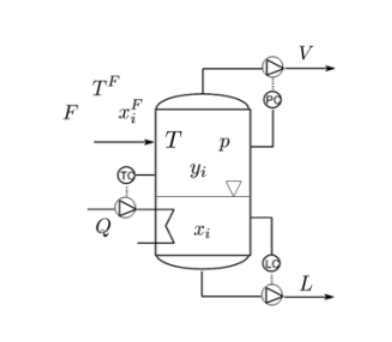

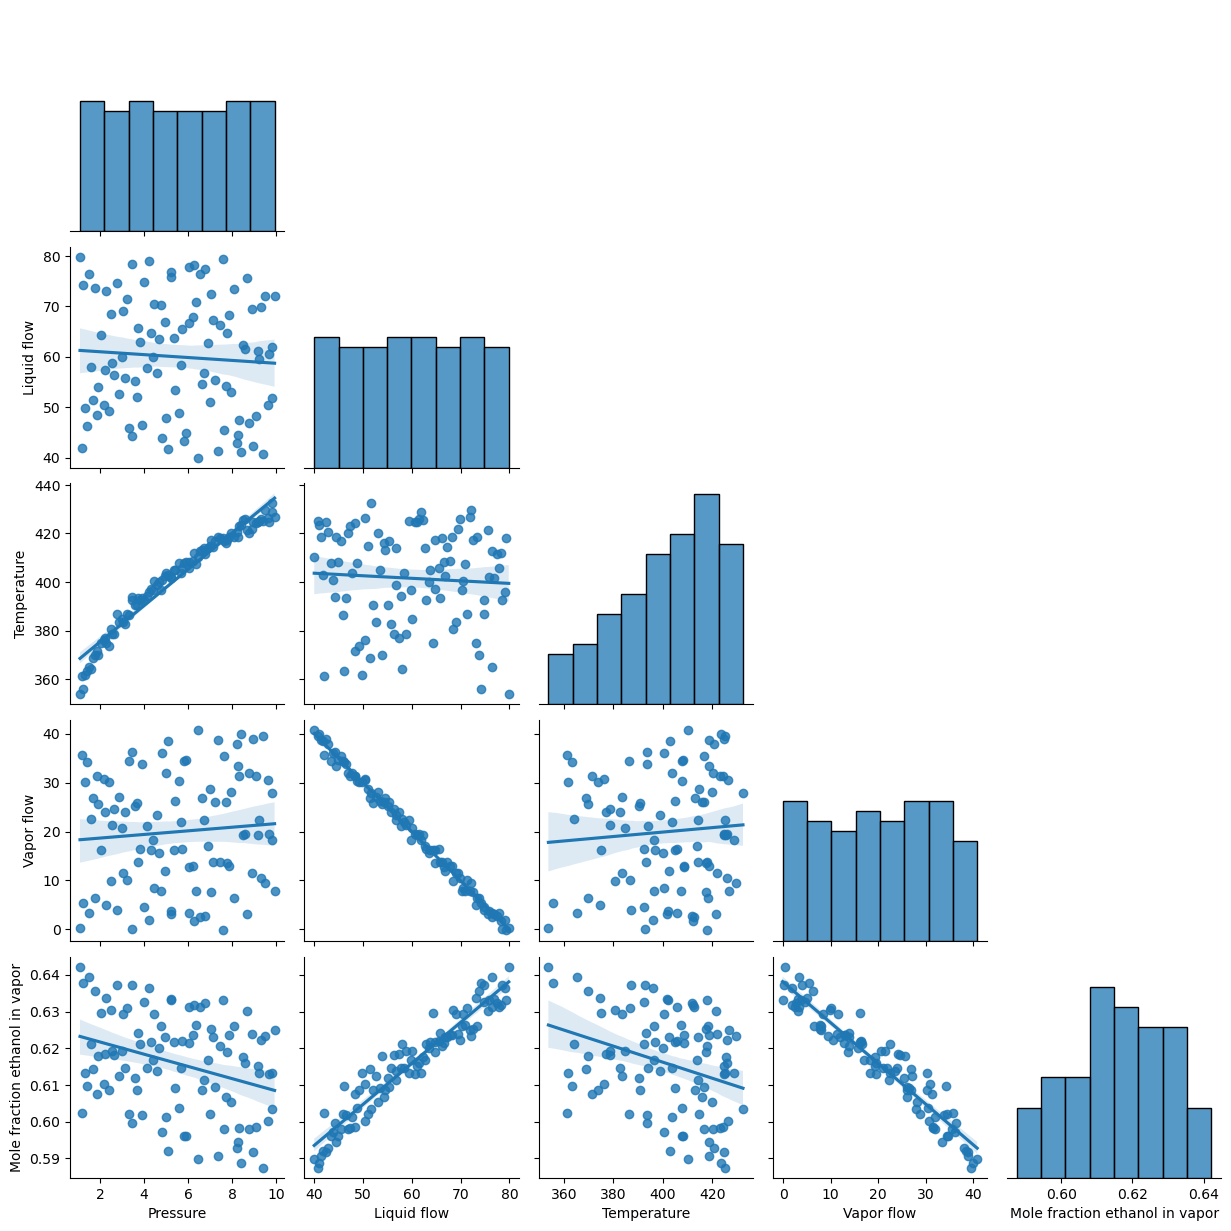

In [9]:
sns.pairplot(data=df_flash, corner=True, kind="reg")

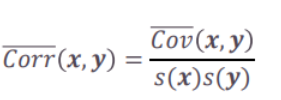

In [10]:
var1 = "Temperature"
var2 = "Pressure"

In [11]:
print(
    f"Pearson correaltion between {var1} and {var2}:",
    np.cov(df_flash[var1], df_flash[var2])[0, 1]
    / (np.std(df_flash[var1], ddof=1) * np.std(df_flash[var2], ddof=1)),
)

Pearson correaltion between Temperature and Pressure: 0.9755269926814931


In [12]:
print(
    f"Spearman correaltion between {var1} and {var2}:",
    np.cov(df_flash.rank()[var1], df_flash.rank()[var2])[0, 1]
    / (np.std(df_flash.rank()[var1], ddof=1) * np.std(df_flash.rank()[var2], ddof=1)),
)

Spearman correaltion between Temperature and Pressure: 0.9943954395439545


In [13]:
df_flash.corr(method="spearman")

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
Pressure,1.000000,-0.065563,0.994395,0.078524,-0.280432
Liquid flow,-0.065563,1.000000,-0.073291,-0.996280,0.967357
Temperature,0.994395,-0.073291,1.000000,0.087609,-0.286169
Vapor flow,0.078524,-0.996280,0.087609,1.000000,-0.966301
Mole fraction ethanol in vapor,-0.280432,0.967357,-0.286169,-0.966301,1.000000


<Axes: >

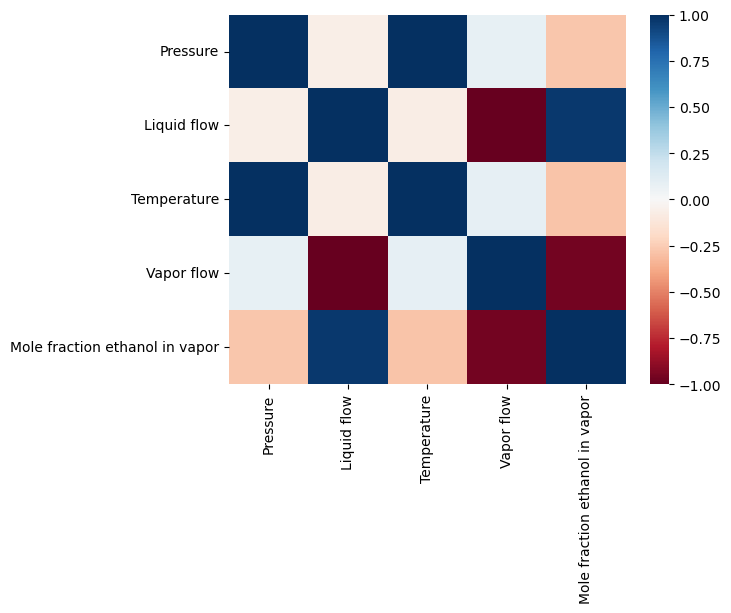

In [14]:
sns.heatmap(df_flash.corr(method="spearman"), vmin=-1, vmax=1, cmap=plt.cm.RdBu)

In [15]:
df_manu = pd.read_excel("data/data_manufacturing.xlsx")

In [16]:
df_manu

,API Particle Size,Mill Time,Screen Size,MgSt Supplier,Lactose Supplier,Sugar Supplier,Talc Supplier,Blend Time,Blend Speed,Compressor,Force,Coating Supplier,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure,Dissolution
0,Small,27,4,Smith Ind,James Ind,Sour,Rough,16.043199,59.887383,COMPRESS2,25.466691,Mac,105.361158,107.945228,70.458995,404.603294,61.007068,79.86
1,Small,11,5,Jones Inc,James Ind,Sour,Smooth,14.361549,59.793030,COMPRESS2,24.934062,Mac,100.232484,107.540101,70.823684,407.367163,60.571220,72.82
2,Small,20,4,Jones Inc,Bond Inc,Sour,Rough,14.458745,60.797487,COMPRESS2,25.503908,Down,100.271603,106.605861,69.197350,399.301868,59.088228,74.18
3,Small,13,3,Smith Ind,Bond Inc,Sweet,Smooth,14.412131,59.398624,COMPRESS1,24.787632,Mac,98.008134,106.093734,68.809087,403.733927,58.844630,69.14
4,Small,13,5,Smith Ind,James Ind,Sweet,Smooth,16.111780,59.921639,COMPRESS2,25.316775,Down,97.582630,108.257381,69.447385,396.709347,59.589137,73.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Large,5,4,Smith Ind,James Ind,Sour,Smooth,13.836013,59.105242,COMPRESS2,25.329694,Coat,101.600640,107.945423,69.915316,401.016280,61.196363,70.58
86,Large,14,3,Smith Ind,Bond Inc,Sweet,Rough,16.963847,61.302848,COMPRESS2,24.578408,Coat,102.168031,107.372107,70.598444,402.636540,59.608586,69.70
87,Large,9,5,Smith Ind,Bond Inc,Sour,Rough,16.505517,61.216797,COMPRESS2,25.013860,Mac,94.154164,107.142674,69.645683,398.417407,61.742415,77.22
88,Large,24,4,Smith Ind,James Ind,Sour,Smooth,15.339437,60.448580,COMPRESS1,25.306691,Down,92.519135,107.320049,70.785988,404.073722,61.721232,78.58


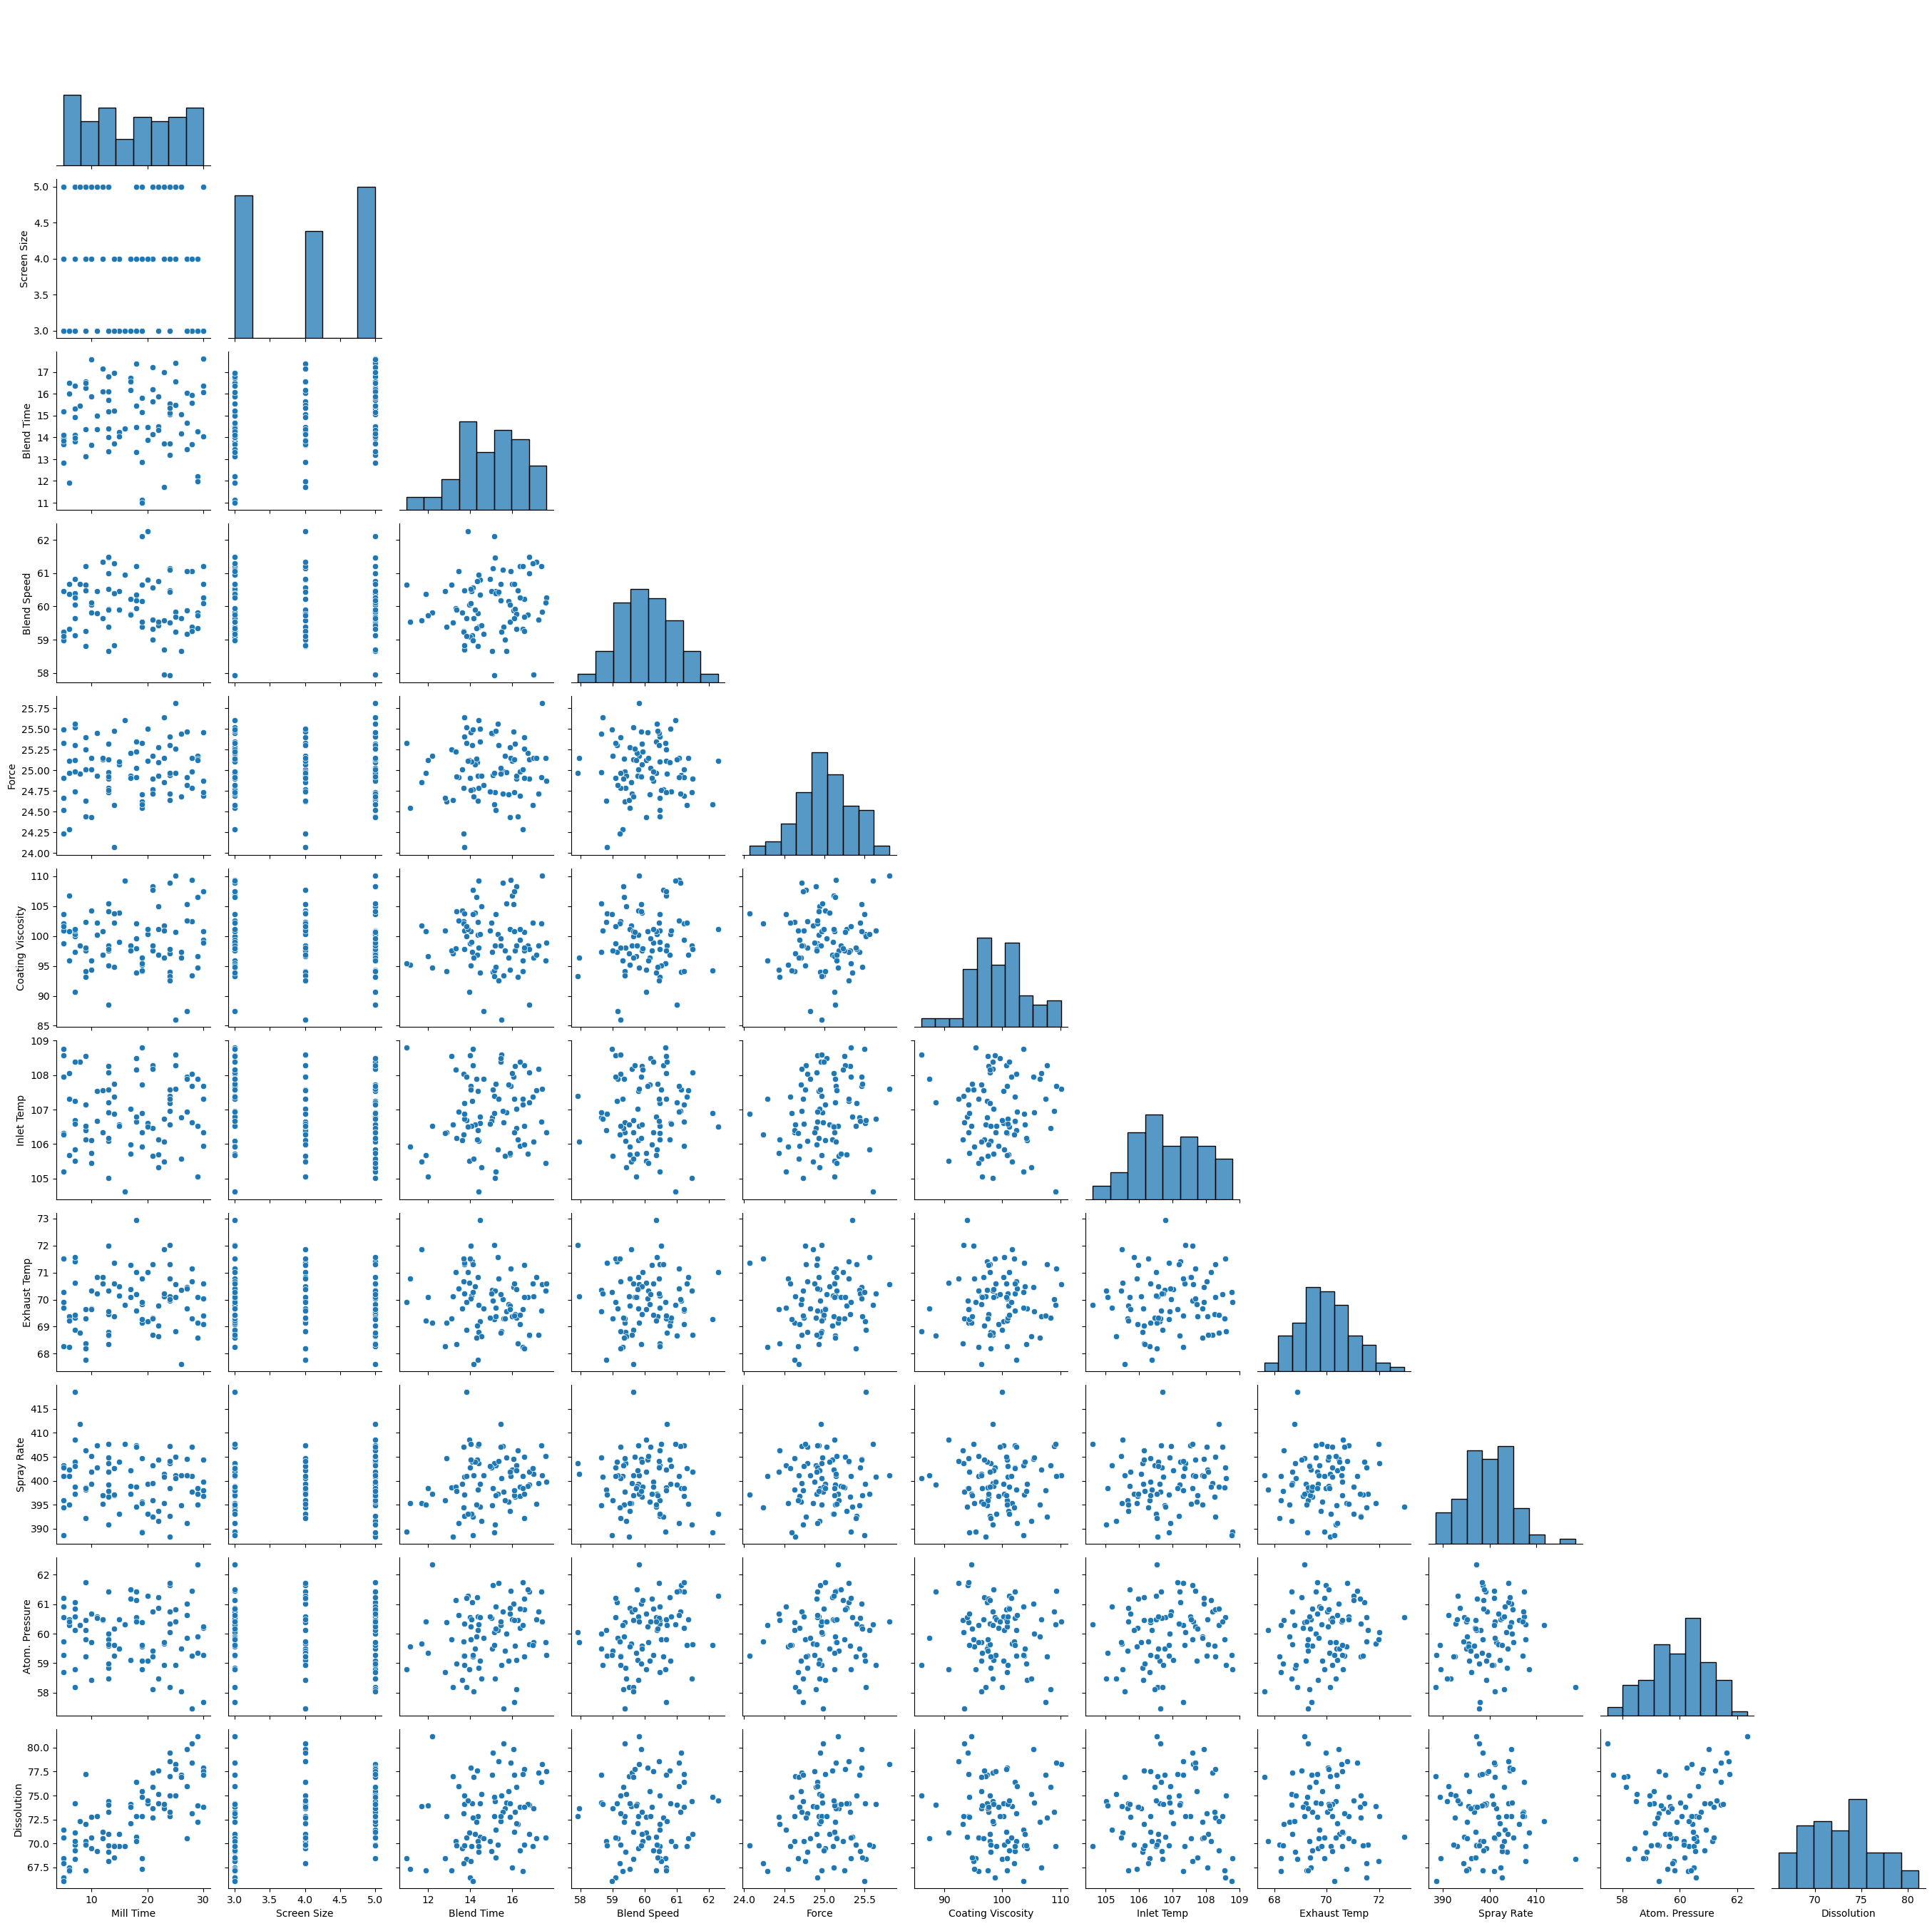

In [17]:
sns.pairplot(df_manu, corner=True)

<Axes: >

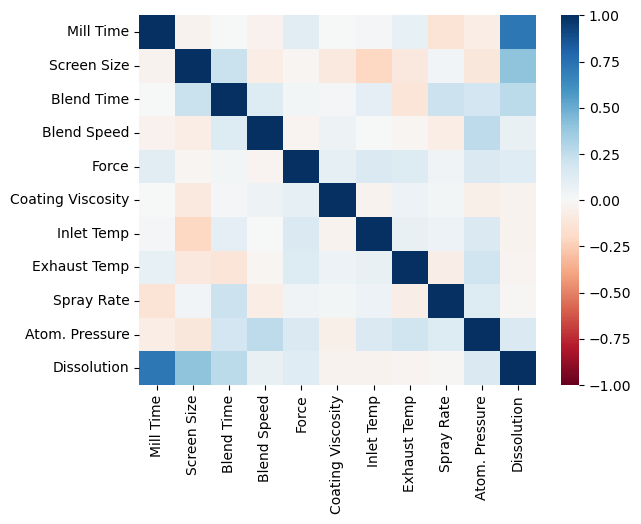

In [18]:
sns.heatmap(df_manu.corr(numeric_only=True), vmin=-1, vmax=1, cmap=plt.cm.RdBu)